In [35]:
#Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [36]:
#Import Data
#mortgage = pd.read_csv('../data/raw_data/30yr_fixed_mortgage_rate.csv')
sales = pd.read_csv(Path("../data/raw_data/house_sales_by_month.csv"),
index_col="Date", parse_dates=True, infer_datetime_format=True)  
fixed_rate = pd.read_csv(Path("../data/raw_data/30yr_fixed_mortgage_rate.csv"), encoding='latin1',   index_col="Date", parse_dates=True, infer_datetime_format=True)


In [37]:
sales= sales.drop(columns=(["Dollar", "Median", "Total"]))
#sales

In [38]:
#sales

In [39]:
#sales=sales["Sales"].str.replace(",","")
#sales

In [40]:
fixed_rate =fixed_rate.astype(float)
sales =sales.astype(int)

In [41]:
sales.dtypes

Sales      int32
Average    int32
Months     int32
dtype: object

In [42]:
fixed_rate.dtypes

rate    float64
dtype: object

In [43]:
# merge dataframes on Date
df =pd.merge (sales, fixed_rate, on='Date', how='outer')
df.head()

,Sales,Average,Months,rate
Date,,,,
2010-01-01,10797.0,176298.0,6.0,5.03
2010-02-01,13781.0,179474.0,7.0,4.99
2010-03-01,20465.0,183981.0,7.0,4.97
2010-04-01,22893.0,184048.0,7.0,5.10
2010-05-01,23812.0,188041.0,7.0,4.89


In [44]:
df= df.dropna()
df

,Sales,Average,Months,rate
Date,,,,
2010-01-01,10797.0,176298.0,6.0,5.03
2010-02-01,13781.0,179474.0,7.0,4.99
2010-03-01,20465.0,183981.0,7.0,4.97
2010-04-01,22893.0,184048.0,7.0,5.10
2010-05-01,23812.0,188041.0,7.0,4.89
2010-06-01,22864.0,201367.0,7.0,4.74
2010-07-01,17336.0,204912.0,8.0,4.56
2010-08-01,17831.0,197616.0,8.0,4.43
2010-09-01,16050.0,189384.0,8.0,4.35


In [45]:
df.columns

Index(['Sales', 'Average', 'Months', 'rate'], dtype='object')

In [46]:
# Creating the X and y sets
X = df.drop('Sales',axis=1)
y = df["Sales"].values

In [47]:
#X.reshape(-1,1)

In [48]:
#X=X.reshape(-1,1)
#predicted

In [49]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, train_size= 0.8, random_state=0)

In [50]:
#X_train

In [51]:
#X_train[0]

In [52]:
#X_train=X_train.reshape(-1,1)

In [53]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler_train = StandardScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
scaler_test = StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

In [54]:
#X_train[0]

In [55]:
#X_test=X_test.reshape(-1,1)

In [56]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [58]:
# Model set-up
number_input_features = 3
hidden_nodes_layer1 = 40

hidden_nodes_layer2 = 20

In [59]:
# Define the model
model = Sequential()

# Layer 1
model.add(
   Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(Dense(1, activation="linear"))

In [60]:
(X_train.shape[1], 1)

(3, 1)

In [61]:
# model = Sequential()
# number_units = 5
# dropout_fraction = 0.2
# # Layer 1
# model.add(LSTM(
#     units=number_units,
#     return_sequences=True,
#     input_shape=(X_train.shape[1], 1))
#     )
# model.add(Dropout(dropout_fraction))
# # Layer 2
# model.add(LSTM(units=number_units, return_sequences=True))
# model.add(Dropout(dropout_fraction))
# # Layer 3
# model.add(LSTM(units=number_units))
# model.add(Dropout(dropout_fraction))
# # Output layer
# model.add(Dense(1))

In [62]:
# Compile the model
model.compile(
    loss= "mean_squared_error",
    optimizer="adam",
    metrics= ['accuracy']
   
)

In [63]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Training the model
batch_size = 10
epochs = 1000
training_history = model.fit(
    X_scaled_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

ch 824/1000
11/11 [==============================] - 0s 2ms/step - loss: 15672532.5000 - accuracy: 0.0000e+00
Epoch 825/1000
11/11 [==============================] - 0s 2ms/step - loss: 14290740.6667 - accuracy: 0.0000e+00
Epoch 826/1000
11/11 [==============================] - 0s 2ms/step - loss: 17975710.7500 - accuracy: 0.0000e+00
Epoch 827/1000
11/11 [==============================] - 0s 1ms/step - loss: 15068137.5833 - accuracy: 0.0000e+00
Epoch 828/1000
11/11 [==============================] - 0s 4ms/step - loss: 15007055.6667 - accuracy: 0.0000e+00
Epoch 829/1000
11/11 [==============================] - 0s 2ms/step - loss: 15725996.6667 - accuracy: 0.0000e+00
Epoch 830/1000
11/11 [==============================] - 0s 2ms/step - loss: 15111702.4167 - accuracy: 0.0000e+00
Epoch 831/1000
11/11 [==============================] - 0s 2ms/step - loss: 16581740.4167 - accuracy: 0.0000e+00
Epoch 832/1000
11/11 [==============================] - 0s 2ms/step - loss: 16483261.2500 - accurac

In [65]:
# Evaluate the model
model.evaluate(X_scaled_test, y_test, verbose=1)

1/1 [==============================] - 1s 523ms/step - loss: 12266530.0000 - accuracy: 0.0000e+00


[12266530.0, 0.0]

In [66]:
#X_scaled_test


In [67]:
# Make predictions using the testing data X_test
predicted = model.predict(X_scaled_test)
#predicted

In [68]:
# Create a DataFrame of Real and Predicted values
df_model = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predicted.ravel()
}, index = df.index[-len(y_test): ]) 

# Show the DataFrame's head
df_model.head()

,Actual,Predicted
Date,,
2018-09-01,16050.0,18407.927734
2018-10-01,18777.0,23174.572266
2018-11-01,31518.0,29969.816406
2018-12-01,25149.0,30938.740234
2019-01-01,25771.0,26169.257812


In [76]:
sales_pred= df_model[:20]
sales_pred.head()

,Actual,Predicted
Date,,
2018-09-01,16050.0,18407.927734
2018-10-01,18777.0,23174.572266
2018-11-01,31518.0,29969.816406
2018-12-01,25149.0,30938.740234
2019-01-01,25771.0,26169.257812


<AxesSubplot:title={'center':'Sales '}, xlabel='Date'>

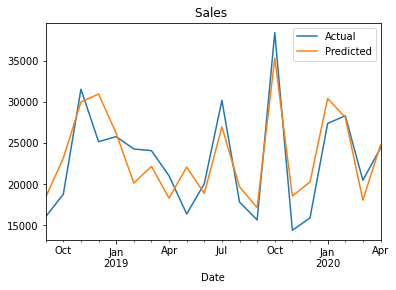

In [77]:
# Plot the real vs predicted prices as a line chart
sales_pred.plot(title="Sales ")